In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '../'); sys.path.insert(0, '../samples')
import json
Settings = json.load(open('../settings.txt'))
import mvpose.data.kth_football2 as kth
from mvpose.data import umpm
from mvpose.geometry.stereo import get_fundamental_matrix
from mvpose import settings
from os.path import join
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_root = Settings['data_root']

# ------------------------
seq1_zipname = 'player2sequence1.zip'
seq1_dir = 'Sequence 1'
Im, Calib, pos2d, pos3d = kth.get(
        data_root, seq1_zipname, seq1_dir, 0, player=2)


P1_kth = Calib[0].P
P2_kth = Calib[1].P
# ------------------------
params = settings.get_settings(ms_radius=30)
root = join(Settings['data_root'], 'pak')
user = Settings['UMPM']['username']
pwd = Settings['UMPM']['password']
tmp = Settings['tmp']
X, Y, Calib = umpm.get(root, 'p2_free_1', user, pwd)
P1_umpm = Calib[0].P
P2_umpm = Calib[1].P
# ------------------------

UMPM


In [26]:
F_kth = get_fundamental_matrix(P1_kth, P2_kth, 1000)
F_umpm = get_fundamental_matrix(P1_umpm, P2_umpm, 1)

F_kth

array([[ 2.02948256e-05,  1.03999669e-04,  7.97190152e-04],
       [ 6.90756759e-05,  8.40873285e-05, -9.41173203e-02],
       [ 4.13154474e-03,  2.35067376e-02,  1.00000000e+00]])

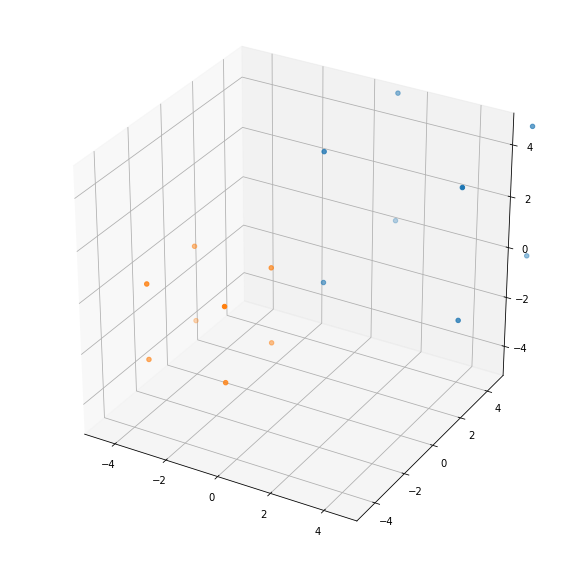

In [3]:
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

def sample_cube(n, offsetx):
    points = []
    for x in range(2):
        for y in range(2):
            for z in range(2):
                points.append((x*n + offsetx, y*n, z*n))
    return np.array(points)

cube1 = sample_cube(5, 1)
cube2 = sample_cube(-3, -1)

ax.scatter(cube1[:,0], cube1[:,1], cube1[:,2])
ax.scatter(cube2[:,0], cube2[:,1], cube2[:,2])

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])


plt.show()